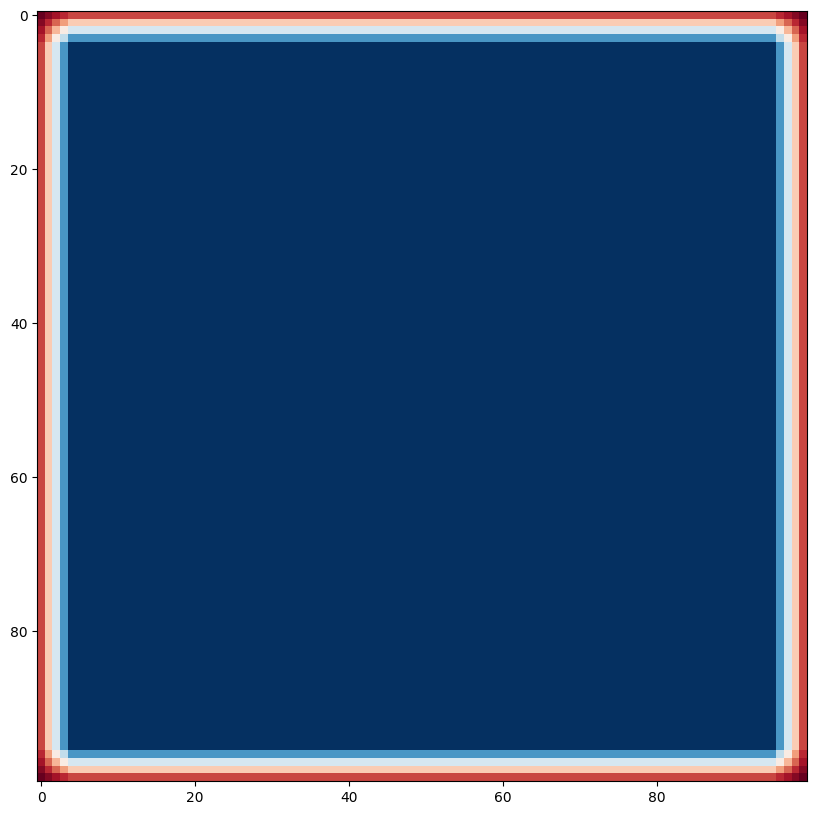

In [3]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as lin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


# Eulers metode, fra matte 1/ProgNumSikk
def euler(f,x0,a,b,N):
 t = np.linspace(a,b,N)
 x = np.zeros((N,x0.size))
 x[0,:] = x0
 for i in np.arange(N-1):
   x[i+1,:] = x[i,:] + (t[i+1]-t[i])*(f(x[i],t[i]))
 return x,t


# bestem antall punkter i gitteret i x-retning
m = 100
a = 5
b = 5

# hvor tykt er luftlaget
c = 0.5

# setter m+2 punkter mellom -a-c og a+c
# m+2 fordi vi teller ikke randene -a og a
x = np.linspace(-a-c,a+c,m+2)

# avstand mellom punktene
h = x[1] - x[0]
m1 = int(c/h)

# antall punkter i gitteret i y-retning
n = 100

# hvor tykt er luftlaget
d = 0.5

# setter n+2 punkter mellom -b-d og b+d
y=np.linspace(-b-d,b+d,n+2)

# avstand mellom punktene
k = y[1]-y[0]
n1 = int(d/k)


# alpha = kappa/(rho.cp); kappa er termisk konduktivitet, rho er tetthet,cp er spes. varmekap
# alpha=1 i materialet som skal varmast og alpha=0.1 i luft
alpha_gas = 0.1
K1 = 0.45
P = 1037.4
Cp = 2600
alpha_materialet = (K1/(Cp * P))
alphas_m = np.full(m, alpha_materialet) #Setter alpha for materialet i m
alphas_n = np.full(n, alpha_materialet) #Setter alpha for materialet i n
alphas_m[:m1]=alpha_gas

alphas_m[-m1:]=alpha_gas

alphas_n[:n1]=alpha_gas
alphas_n[-n1:]=alpha_gas
B1 = sp.diags(alphas_m)
B2 = sp.diags(alphas_n)

# setter opp matrise tilsvarende Poissonligning i x-retning
L1 = (1/h**2)*B1 @ sp.diags([1, -2, 1],[-1, 0, 1],shape=(m, m))

# identitetsmatrise i x-koordinatene
I1 = sp.eye(m)

# setter opp matrise tilsvarende Poissonligning i y-retning
L2 = (1/k**2)*B2 @ sp.diags([1, -2, 1], [-1, 0, 1], shape=(n, n))

# identitetsmatrise i y-koordinateneI2 = sp.eye(n)
I2 = sp.eye(n)

# setter sammen matrisa med Kroneckerproduktet
A = sp.kron(L1,I2) + sp.kron(I1,L2)


# Randbetingelsene
Zm_l = np.zeros(m)
Zm_l[0] = -1/(h**2)
Zm_r = np.zeros(m)
Zm_r[-1] = -1/(h**2)
Zn_l = np.zeros(n)
Zn_l[0] = -1/(k**2)
Zn_r = np.zeros(n)
Zn_r[-1] = -1/(k**2)

def ute(x):
 return 200

ute = np.vectorize(ute)

F = sp.kron(ute(x[1:-1]),Zn_l) + sp.kron(ute(x[1:-1]),Zn_r) + sp.kron(Zm_l,ute(y[1:-1])) + sp.kron(Zm_r,ute(y[1:-1]))


# Løsning
def f(x,t):
 return A @ x - F

X, Y = np.meshgrid(x[1:-1],y[1:-1])

u0 = 20 + np.zeros(m*n)

u, t = euler(f, u0, 0, 10, 10000)

fig, ax = plt.subplots(figsize=(15,10))

ims = []
for i in range(40):
 im = ax.imshow(-np.reshape(u[100*i,:],(m,n)),cmap='RdBu', animated=True)
 if i == 0:
    ax.imshow(-np.reshape(u[0,:],(m,n)),cmap='RdBu') 
 ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_jshtml())

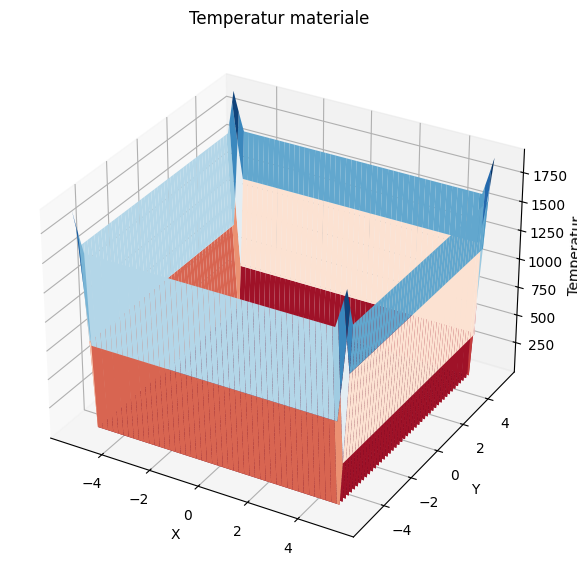

In [4]:
# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, np.reshape(u[1000,:],(m,n)), cmap='RdBu')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Temperatur')
ax.set_title('Temperatur materiale')
plt.show()